#  Netflix Movies and TV Shows 데이터셋 분석
<br>
<br>

### 데이터셋 출처
* https://www.kaggle.com/datasets/shivamb/netflix-shows
<br>
<br>

### 데이터 간단 이해
* Netflix Movies and TV Shows

```
About this Dataset: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.
```

```
* Netflix 는 가장 인기 있는 미디어 및 비디오 스트리밍 플랫폼 중 하나이다.
* 데이터 세트를 통해 Netflix의 영화, TV프로그램의 목록과 출연진, 감독, 등급, 출시 연도, 기간 등과 같은 세부 정보를 얻을 수 있다.
```
<br>
<br>

### 학습 내용
* 데이터 분석을 위해 배운 내용을 실습해본다.
* Netflix Movies and TV Shows Data를 분석하여 Netflix 트렌드를 살펴본다.

### 01. 라이브러리 불러오기

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [35]:
print("pandas 버전 : ", pd.__version__)
print("NumPy 버전 : ", np.__version__)
print("matplotlib 버전 : ", matplotlib.__version__)

pandas 버전 :  1.1.3
NumPy 버전 :  1.18.5
matplotlib 버전 :  3.3.2


### 02. 데이터 가져오기

In [6]:
netflix = pd.read_csv("./data/netflix/netflix_titles.csv")
netflix.shape

(8807, 12)

#### 데이터 살펴보기

In [8]:
### [].shape (행, 열) 크기 확인
### [].columns 컬럼명 확인
### [].head() 앞에서부터 5행 출력
### [].tail() 뒤에서부터 5행 출력
### [].info() 데이터에 대한 전반적인 정보 확인
### [].describe() 컬럼별 요약 통계량 출력

In [10]:
# 어떤 컬럼명을 가지나?
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
# 위에서부터 5행
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
# 뒤에서부터 5행
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [17]:
# 데이터 정보 확인
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### 데이터 컬럼 설명
|No.|컬럼명| 설명 |
|:---:|:---:|:---:|
|0|show_id|id|
|1|type|TV or Movie|
|2|title|제목|
|3|director|제작자|
|4|cast|출연진|
|5|country|제작국가|
|6|date_added|Netflix에 공개된 날짜|
|7|release_year|출시년도|
|8|rating|관람등급|
|9|duration|작품 길이|
|10|listed_in|분류|
|11|description|개요|

In [18]:
# 수치형 데이터 정보 확인
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [23]:
# release_year만 int64이고 나머지는 다 object이므로 범주형도 확인
netflix.describe(include = np.object_)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s7459,Movie,Felon,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [24]:
# 결측치 확인하기
print(netflix.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


<AxesSubplot:>

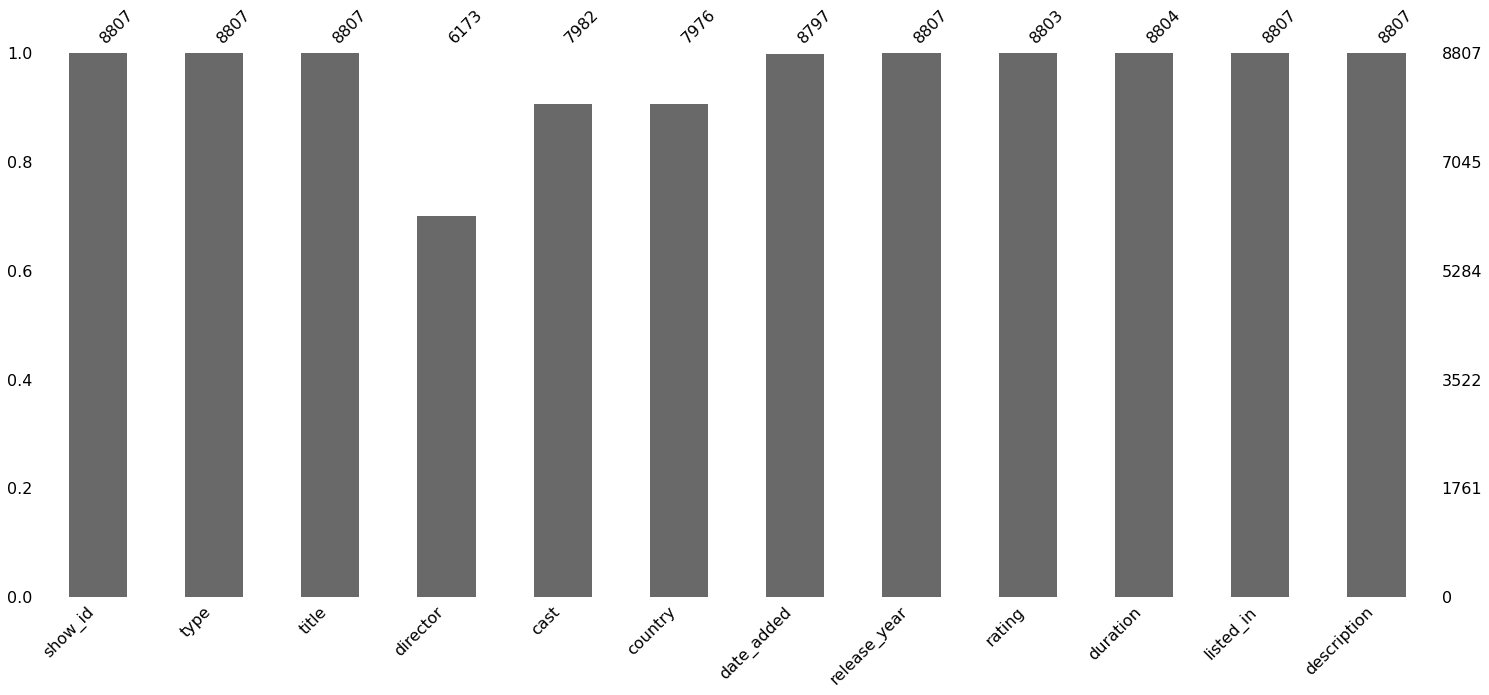

In [45]:
import missingno as msno
msno.bar(netflix)

director에 2634개, cast에 825개, country에 831개, date_added에 10개, rating에 4개, duration에 3개의 결측치가 있다.

### 03. 데이터 전처리

#### 1) 결측치 처리 : 삭제

In [37]:
# director(제작자), cast(출연진)은 대체할 값을 넣어주기 힘들고, 결측치가 많으므로 삭제

netfl = netflix.drop(["director", "cast"], axis = 1)
print(netfl.shape)

(8807, 10)


In [38]:
netfl.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### 2) 결측치 처리 : fillna()

In [39]:
# country는 어느 나라에서 제작된 작품이 많은지 보기 위해 NaN 값을 Unknown으로 채움
# fillna() 사용

netfl["country"] = netfl["country"].fillna("Unkonwn")
netfl["country"].isnull().sum()

0